In [17]:
import gzip
from collections import defaultdict

import numpy as np
import random

import matplotlib.pyplot as plt

def readGz(f):
  for l in gzip.open(f):
    yield eval(l)

In [18]:
# shuffle
index_train= list(range(200000))
np.random.shuffle(index_train)
index_train = index_train[0:100000]

In [19]:
# read every line
userBusiness = defaultdict(list)
userBusiness_train = defaultdict(list)
userBusiness_vali = defaultdict(list)
count = -1
validation_purchase = open("validation_purchase.txt", 'w')
validation_P = open("validation_P.txt", 'w')
train_P = open("train_P.txt", 'w')
for l in readGz("train.json.gz"):
    count = count + 1
    user,business = l['reviewerID'],l['itemID']
    userBusiness[user].append(business)
    if count < 100000:
        user_train,business_train = l['reviewerID'],l['itemID']
        userBusiness_train[user_train].append(business_train)
        train_P.write(user_train + '-' + business_train + ",1\n")
    else:
        user_vali,business_vali = l['reviewerID'],l['itemID']
        userBusiness_vali[user].append(business_vali)
        validation_purchase.write(user_vali + '-' + business_vali + ",1\n")
        validation_P.write(user_vali + '-' + business_vali + ",1\n")


In [21]:
len(userBusiness_vali)

36402

In [12]:


# generate 100000 nonpurchase
# item set user set
userset=list()
itemset=list()
notPurchase=list()
for l in readGz("train.json.gz"):
    userset.append(l['reviewerID'])
    itemset.append(l['itemID'])

userset = set(userset)
itemset = set(itemset)

# random and writein
validation_notpurchase = open("validation_notpurchase.txt", 'w')
count = 0
while count < 100000:
    pickedu= random.sample(userset, 1)
    pickedi= random.sample(itemset, 1)
    if pickedi[0] not in userBusiness[pickedu[0]]:
        count = count + 1
        validation_notpurchase.write(pickedu[0] + '-' + pickedi[0] + ",0\n")
        validation_P.write(pickedu[0] + '-' + pickedi[0] + ",0\n")
        
validation_notpurchase.close()
validation_purchase.close()
validation_P.close()
train_P.close()

KeyboardInterrupt: 

#### 1. 
Although we have built a validation set, it only consists of positive samples. For this task we also need
examples of user/item pairs that weren’t purchased. Build such a set by randomly sampling users and
items until you have 100,000 non-purchased user/item pairs. This random sample combined with your
100,000 validation reviews now corresponds to the complete validation set for the purchase prediction
task. Evaluate the performance (accuracy) of the baseline model on the validation set you have built (1
mark).

In [127]:
# evaluate the performance of the baseline model
train_purchase = open('train_P.txt').readlines()
validation_purchase = open('validation_P.txt').readlines()

businessCount = defaultdict(int)
totalPurchases = 0

for l in train_purchase:
  user,business = l[0:10], l[11:21]  
  businessCount[business] += 1
  totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalPurchases/2: break

predictions = open("predictions_Purchase.txt", 'w')
right = 0
right1 = 0
right2 = 0
for l in validation_purchase:
  u,i,r = l[0:10], l[11:21], l[22:23]
  if i in return1:
    predictions.write(u + '-' + i + ",1\n")
    if r == '1':
        right = right + 1
        right1 += 1
  else:
    predictions.write(u + '-' + i + ",0\n")
    if r == '0':
        right = right + 1
        right2 += 1


acc = right/len(validation_purchase)

print('accuracy is ' + str(acc))
predictions.close()


accuracy is 0.62852
44482
81222


#### 2. 
The existing ‘purchase prediction’ baseline just returns True if the item in question is ‘popular,’ using a
threshold of the 50th percentile of popularity (totalPurchases/2). Assuming that the ‘non-purchased’
test examples are a random sample of user-purchase pairs, is this particular threshold value the best? If
not, see if you can find a better one (and report its performance), or if so, explain why it is the best (1
mark)

We can see that in the baseline, we do not care about the user but only care about the product. Assume the ratio that we should use to be x. 

We have two part of accuracy.

The first part is the accuracy of Purchased

The second part is the accuracy of non-Purchased

For the first part, the higher x can lead to higher accuracy. The items in the vali_set is a sample of purchased items. That means the accracy for this part is x.

For the second part, the higher x can lead to lower accuracy. The items in the vali_set is a sample of item cataglories. The accuracy is 

$$ 1-cataglories_{in\_x} / all\_cataglories$$

The accracy can be write as 

$$(1-\frac{cataglories_{in\_x}}{all\_cataglories}+x)/2$$

So there should be one x that make the accuracy to be optimal.

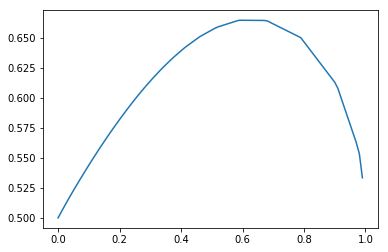

In [156]:
# all cataglories
all_cata = len(itemset)

# approximate accuracy

x = np.arange(0., 1., 0.01)
acc = list()
acc1=list()
businessCount = defaultdict(int)
totalPurchases = 0

for l in train_purchase:
  user,business = l[0:10], l[11:21]  
  businessCount[business] += 1
  totalPurchases += 1

for w in x:
    return2 = set()
    count = 0
    for ic, i in mostPopular:
      count += ic
      return2.add(i)
      if count > totalPurchases*w: break

    cata_inx = len(return2)/all_cata
    acc.append((1 - cata_inx + w)/2)
    acc1.append(1-cata_inx)
    

plt.plot(x,acc)
plt.show()

In [154]:
## evaluate the performance of the baseline model

businessCount = defaultdict(int)
totalPurchases = 0

for l in train_purchase:
  user,business = l[0:10], l[11:21]  
  businessCount[business] += 1
  totalPurchases += 1

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalPurchases*0.6: break

predictions = open("predictions_Purchase.txt", 'w')
right = 0
right1 = 0
right2 = 0
for l in validation_purchase:
  u,i,r = l[0:10], l[11:21], l[22:23]
  if i in return1:
    predictions.write(u + '-' + i + ",1\n")
    if r == '1':
        right = right + 1
        right1 += 1
  else:
    predictions.write(u + '-' + i + ",0\n")
    if r == '0':
        right = right + 1
        right2 += 1


acc = right/len(validation_purchase)

print('accuracy is ' + str(acc))
predictions.close()

accuracy is 0.62641
72768


### 3. 
Users may tend to repeatedly purchase items of the same type. Build a baseline that returns ‘True’ if
a user has purchased an item of the same category before (at least one category in common), or zero
otherwise (1 mark).

In [159]:
user = []
item = []
category = []

for l in readGz("train.json.gz"):
    user.append(l['reviewerID'])
    item.append(l['itemID'])
    category.append(l['categories'])

# item to cat
IC_dict = dict(zip(item,category))

train_purchase = open('train_P.txt').readlines()
validation_purchase = open('validation_P.txt').readlines()

# 每个人在train中有的cat
usercat_train = defaultdict(dict)
for i in train_purchase:
    user, item = i[0:10], i[11:21]
    usercat_train[user][item]=(IC_dict[item])

usercat_vali = defaultdict(dict)
for i in validation_purchase:
    user, item = i[0:10], i[11:21]
    usercat_vali[user][item]=(IC_dict[item])

In [230]:
def cata(dicti,i):
    x = list()
    y = list()
    for j in dicti[i]:
        for k in dicti[i][j]:
            x.append(k)
    for i in x:
        for j in i:
            y.append(j)
    y = list(set(y))
    return(y)

In [255]:
def cata2(dicti,i):
    x = list()
    for j in dicti[i]:
        x.append(j)
    x=list(set(j))
    return(x)

In [270]:
count = 0
for i in validation_purchase:
    x = list()
    y = list()
    x = cata2(IC_dict, i[11:21])
    y = cata(usercat_train, i[0:10])
    lab = any(j in y for j in x)
    if lab == int(i[22:23]):
        count = count +1

portion = count/len(validation_purchase)
print(portion)

0.493485


#### 4. 
To run our model on the test set, we’ll have to use the files ‘pairs Purchase.txt’ to find the reviewerID/itemID
pairs about which we have to make predictions. Using that data, run the above model and
upload your solution to Kaggle. Tell us your Kaggle user name (1 mark). If you’ve already uploaded a
better solution to Kaggle, that’s fine too!


In [ ]:
# ### Would-purchase baseline: just rank which businesses are popular and which are not, and return '1' if a business is among the top-ranked

# businessCount = defaultdict(int)
# totalPurchases = 0

# for l in readGz("train.json.gz"):
#   user,business = l['reviewerID'],l['itemID']  
#   businessCount[business] += 1
#   totalPurchases += 1

# mostPopular = [(businessCount[x], x) for x in businessCount]
# mostPopular.sort()
# mostPopular.reverse()

# return1 = set()
# count = 0
# for ic, i in mostPopular:
#   count += ic
#   return1.add(i)
#   if count > totalPurchases/2: break

# predictions = open("predictions_Purchase.txt", 'w')
# for l in open("pairs_Purchase.txt"):
#   if l.startswith("reviewerID"):
#     #header
#     predictions.write(l)
#     continue
#   u,i = l.strip().split('-')
#   if i in return1:
#     predictions.write(u + '-' + i + ",1\n")
#   else:
#     predictions.write(u + '-' + i + ",0\n")

# predictions.close()

#### 5. 
What is the performance of a trivial predictor
rating(user, item) = α
on the validation set, and what is the value of α (1 mark)?

alpha is the average rate of all ratings

In [274]:
allRatings_train = []
userRatings_train = defaultdict(list)
allRatings_vali = []
userRatings_vali = defaultdict(list)
count = -1
for l in readGz("train.json.gz"):
    count += 1
    if count < 100000:
        user,business = l['reviewerID'],l['itemID']
        allRatings_train.append(l['rating'])
        userRatings_train[user].append(l['rating'])
    else:
        user,business = l['reviewerID'],l['itemID']
        allRatings_vali.append(l['rating'])
        userRatings_vali[user].append(l['rating'])  

In [286]:
globalAverage = sum(allRatings_train) / len(allRatings_train)
s = 0
count = 0
for i in userRatings_vali:
    for j in userRatings_vali[i]:
        s += (j-globalAverage)**2
        count += 1
s/count


1.222481119999133

#### 6. 
Fit a predictor of the form
rating(user, item) ' α + βuser + βitem,
by fitting the mean and the two bias terms as described in the lecture notes. Use a regularization
parameter of λ = 1. Report the MSE on the validation set (1 mark)

In [ ]:
### Would-purchase baseline: just rank which businesses are popular and which are not, and return '1' if a business is among the top-ranked

businessCount = defaultdict(int)
totalPurchases = 0

for l in readGz("train.json.gz"):
  user,business = l['reviewerID'],l['itemID']  
  businessCount[business] += 1
  totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalPurchases/2: break

predictions = open("predictions_Purchase.txt", 'w')
for l in open("pairs_Purchase.txt"):
  if l.startswith("reviewerID"):
    #header
    predictions.write(l)
    continue
  u,i = l.strip().split('-')
  if i in return1:
    predictions.write(u + '-' + i + ",1\n")
  else:
    predictions.write(u + '-' + i + ",0\n")

predictions.close()

In [ ]:
### Rating baseline: compute averages for each user, or return the global average if we've never seen the user before

allRatings = []
userRatings = defaultdict(list)
for l in readGz("train.json.gz"):
  user,business = l['reviewerID'],l['itemID']
  allRatings.append(l['rating'])
  userRatings[user].append(l['rating'])

globalAverage = sum(allRatings) / len(allRatings)
userAverage = {}
for u in userRatings:
  userAverage[u] = sum(userRatings[u]) / len(userRatings[u])

predictions = open("predictions_Rating.txt", 'w')
for l in open("pairs_Rating.txt"):
  if l.startswith("reviewerID"):
    #header
    predictions.write(l)
    continue
  u,i = l.strip().split('-')
  if u in userAverage:
    predictions.write(u + '-' + i + ',' + str(userAverage[u]) + '\n')
  else:
    predictions.write(u + '-' + i + ',' + str(globalAverage) + '\n')

predictions.close()

In [ ]:
### Would-purchase baseline: just rank which businesses are popular and which are not, and return '1' if a business is among the top-ranked

businessCount = defaultdict(int)
totalPurchases = 0

for l in readGz("train.json.gz"):
  user,business = l['reviewerID'],l['itemID']  
  businessCount[business] += 1
  totalPurchases += 1

mostPopular = [(businessCount[x], x) for x in businessCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
  count += ic
  return1.add(i)
  if count > totalPurchases/2: break

predictions = open("predictions_Purchase.txt", 'w')
for l in open("pairs_Purchase.txt"):
  if l.startswith("reviewerID"):
    #header
    predictions.write(l)
    continue
  u,i = l.strip().split('-')
  if i in return1:
    predictions.write(u + '-' + i + ",1\n")
  else:
    predictions.write(u + '-' + i + ",0\n")

predictions.close()